#### Импорт библиотек и загрузка датасета

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Загрузка данных (повторно для полноты)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/winequality-red.csv', sep=';', na_values=['-', '', ' ']) # <- Сделано через colab изменить под себя

#### ЗАДАНИЕ 1

---
Анализ пропусков


Статистика пропусков:
             Признак  Количество пропусков  % пропусков
       fixed acidity                     5         0.31
                  pH                     3         0.19
 free sulfur dioxide                     3         0.19
           chlorides                     3         0.19
      residual sugar                     1         0.06
         citric acid                     1         0.06
    volatile acidity                     1         0.06
total sulfur dioxide                     1         0.06
           sulphates                     1         0.06
             density                     0         0.00
             alcohol                     0         0.00
             quality                     0         0.00

Общее количество пропусков: 19


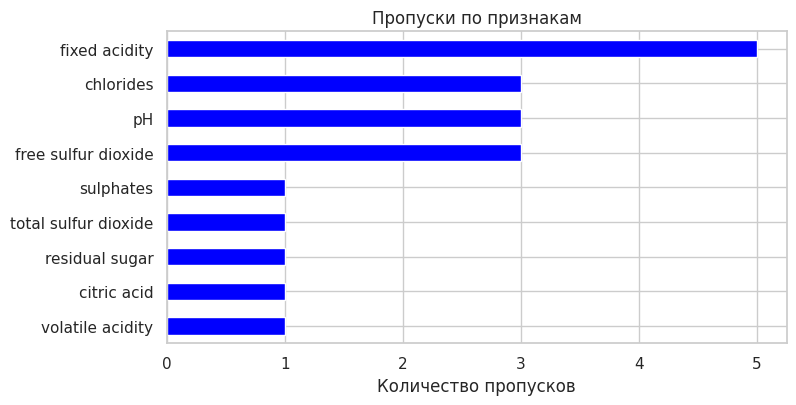

In [ ]:
# Пропуски
missing_data = pd.DataFrame({
    'Признак': df.columns,
    'Количество пропусков': df.isnull().sum(),
    '% пропусков': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('Количество пропусков', ascending=False)

print("\nСтатистика пропусков:")
print(missing_data.to_string(index=False))

total_missing = df.isnull().sum().sum()
print(f"\nОбщее количество пропусков: {total_missing}")

# Визуализация пропусков
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values()

if len(missing) > 0:
    plt.figure(figsize=(8, max(4, len(missing) * 0.45)))
    missing.plot(kind='barh', color='blue')
    plt.title('Пропуски по признакам')
    plt.xlabel('Количество пропусков')
    plt.show()
else:
    print("Пропусков нет")

#### ЗАДАНИЕ 2

---
Анализ выбросов

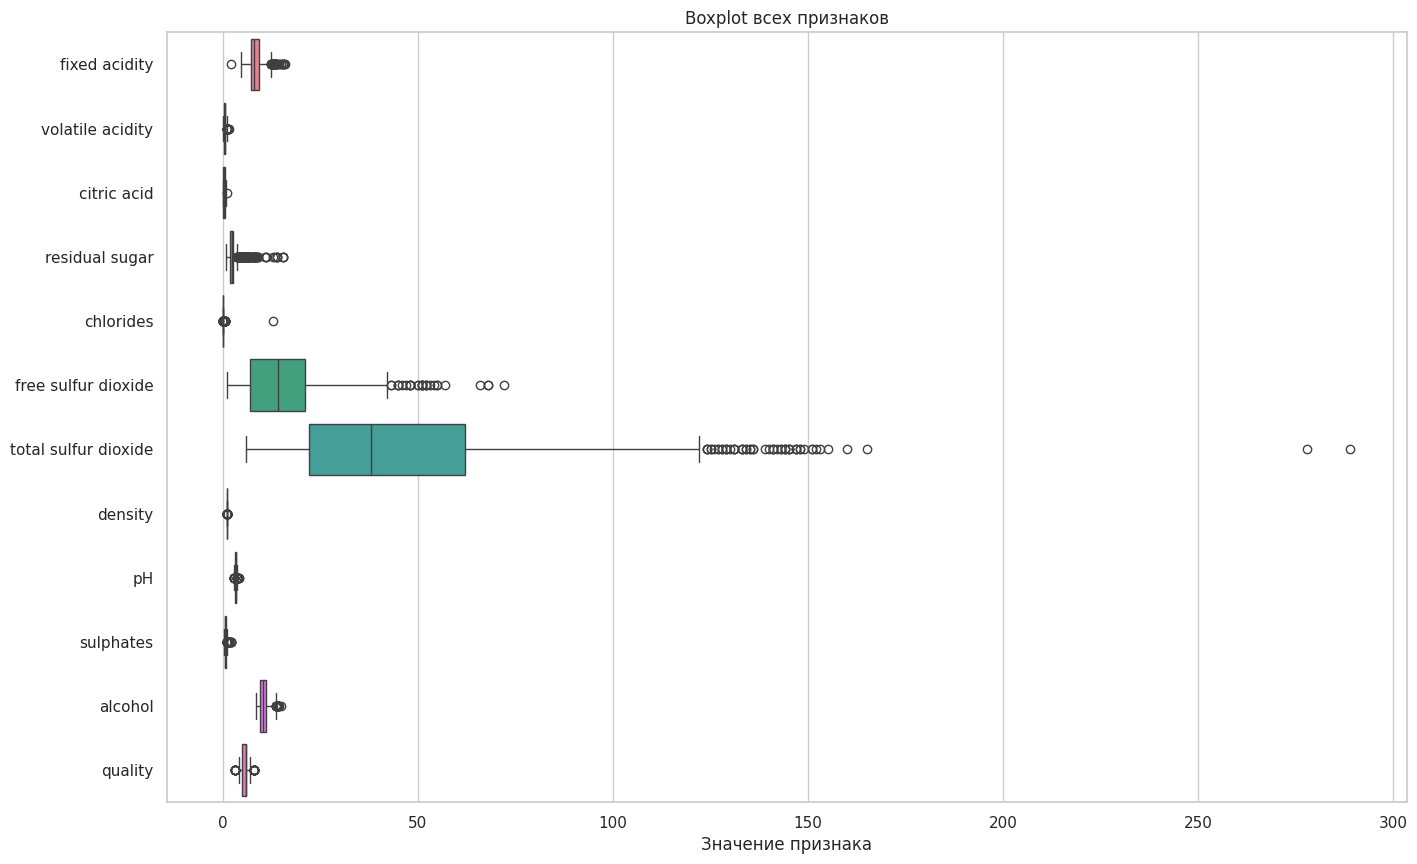


Статистика выбросов:
             Признак     Q1     Q3    IQR  Нижняя граница  Верхняя граница  Выбросов  % выбросов
      residual sugar  1.900  2.600  0.700           0.850            3.650       157        9.82
           chlorides  0.070  0.090  0.020           0.040            0.120       112        7.00
           sulphates  0.550  0.730  0.180           0.280            1.000        59        3.69
total sulfur dioxide 22.000 62.000 40.000         -38.000          122.000        55        3.44
       fixed acidity  7.100  9.200  2.100           3.950           12.350        50        3.13
             density  0.996  0.998  0.002           0.992            1.001        45        2.81
                  pH  3.210  3.400  0.190           2.925            3.685        35        2.19
 free sulfur dioxide  7.000 21.000 14.000         -14.000           42.000        29        1.81
             quality  5.000  6.000  1.000           3.500            7.500        28        1.75
    vola

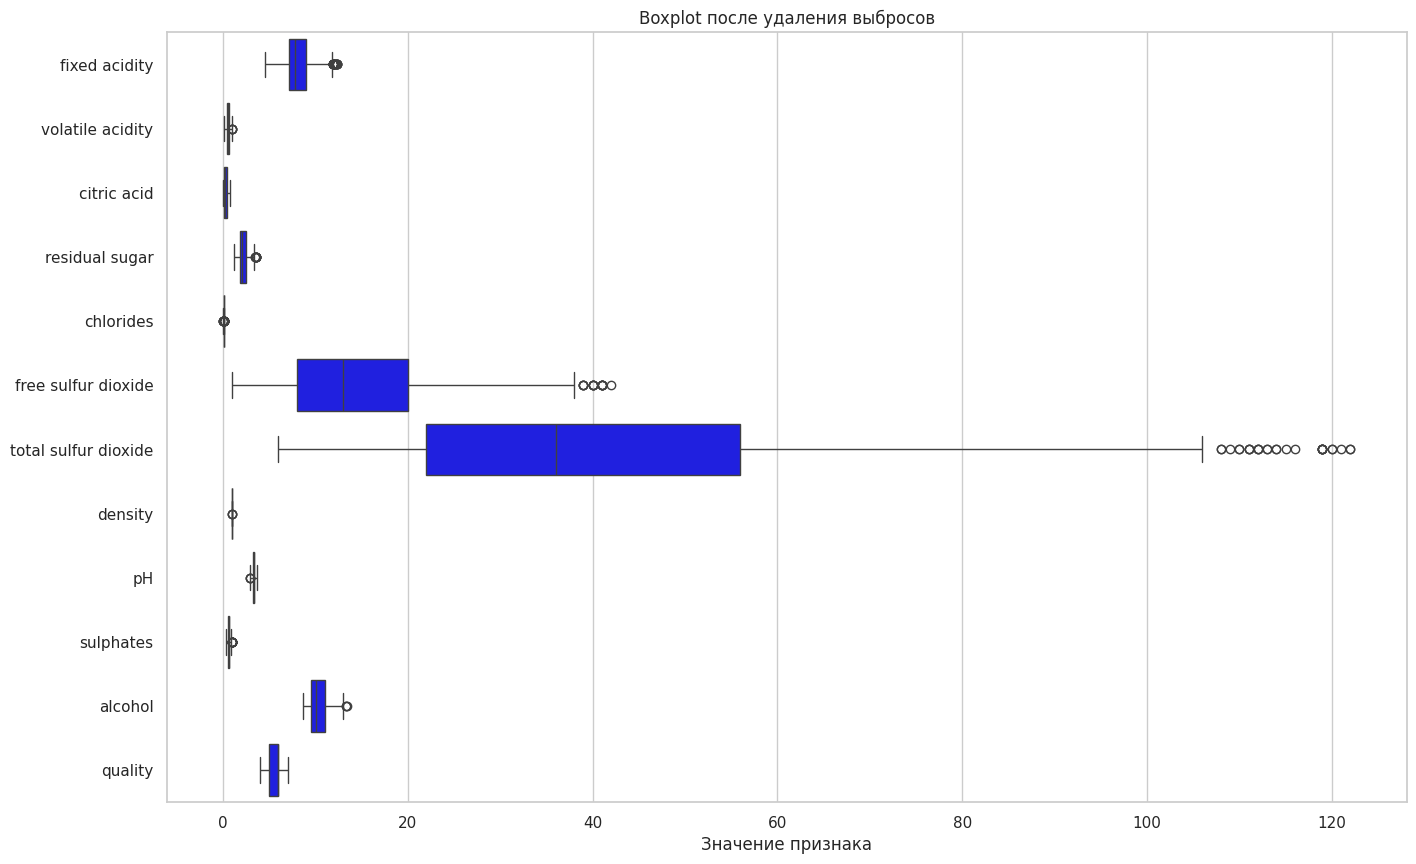

In [ ]:
# Визуализация
plt.figure(figsize=(16, 10))
sns.boxplot(data=df, orient='h')
plt.title('Boxplot всех признаков')
plt.xlabel('Значение признака')
plt.show()

# Расчет выбросов
outliers_summary = []
rows_with_outliers = set()

for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Выявление выбросов
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    n_outliers = len(outliers)
    perc_outliers = (n_outliers / len(df)) * 100

    outliers_summary.append({
        'Признак': col,
        'Q1': round(Q1, 3),
        'Q3': round(Q3, 3),
        'IQR': round(IQR, 3),
        'Нижняя граница': round(lower_bound, 3),
        'Верхняя граница': round(upper_bound, 3),
        'Выбросов': n_outliers,
        '% выбросов': round(perc_outliers, 2)
    })
    rows_with_outliers.update(outliers.index.tolist())

# Вывод статистики
outliers_df = pd.DataFrame(outliers_summary).sort_values('% выбросов', ascending=False)
print("\nСтатистика выбросов:")
print(outliers_df.to_string(index=False))

# Удаление строк с выбросами
total_rows_before = len(df)
n_outlier_rows = len(rows_with_outliers)
perc_removed = (n_outlier_rows / total_rows_before) * 100

print(f"\nВсего строк с выбросами хотя бы в одном признаке: {n_outlier_rows}")
print(f"Датасет до удаления: {total_rows_before} строк")
print(f"Датасет после удаления: {total_rows_before - n_outlier_rows} строк")

df_clean = df.drop(index=rows_with_outliers).reset_index(drop=True)

# Визуализация после удаления выбросов
plt.figure(figsize=(16, 10))
sns.boxplot(data=df_clean, orient='h', color='blue')
plt.title('Boxplot после удаления выбросов')
plt.xlabel('Значение признака')
plt.show()

#### ЗАДАНИЕ 3

---
Анализ пропусков и выбросов (на другом датасете)

Анализ пропусков в данных:
      Пропусков  % пропусков
Levy       5819        30.25


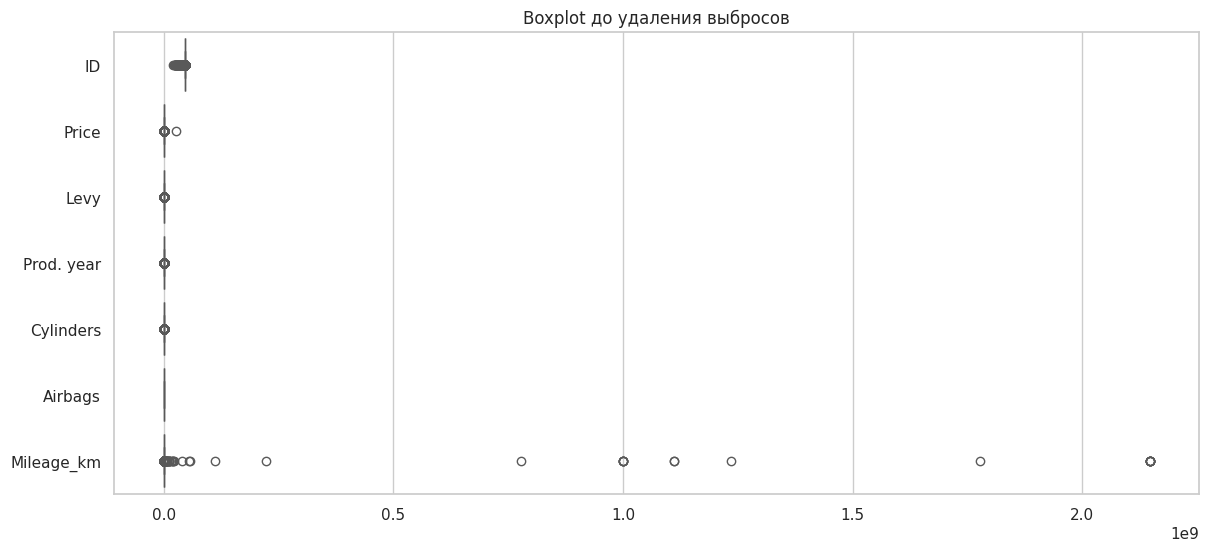

Статистика выбросов:
   Признак  Выбросов  % выбросов
 Cylinders      4870       25.32
        ID      2531       13.16
     Price      1073        5.58
Prod. year       982        5.10
      Levy       686        3.57
Mileage_km       640        3.33
   Airbags         0        0.00

Удалено строк с выбросами: 8467


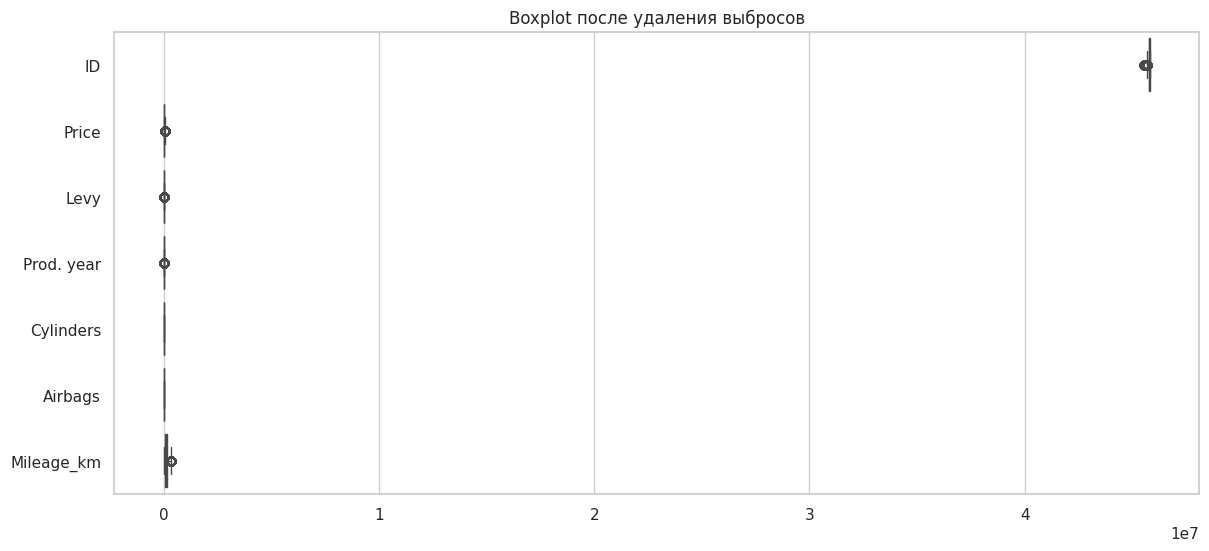

In [ ]:
# Загрузка данных
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/car_price_prediction.csv',
                 na_values=['-', '', ' '], on_bad_lines='skip')

print("Анализ пропусков в данных:")
missing_stats = pd.DataFrame({
    'Пропусков': df.isnull().sum(),
    '% пропусков': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('Пропусков', ascending=False)

# Вывод столбцов с пропусками
missing_cols = missing_stats[missing_stats['Пропусков'] > 0]
if len(missing_cols) > 0:
    print(missing_cols.to_string())

# Создание числового столбца для пробега (если есть)
for col in df.columns:
    if df[col].dtype == 'object' and df[col].dropna().astype(str).str.contains('km').any():
        df[f'{col}_km'] = df[col].str.extract(r'(\d+)').astype(float)

# Выбор числовых столбцов (исключая категориальные и с малым разнообразием)
numeric_cols = [col for col in df.select_dtypes(include=[np.number]).columns
                if df[col].nunique() > 3 and col != 'year']

# Визуализация до удаления выбросов
plt.figure(figsize=(14, max(6, len(numeric_cols) * 0.4)))
sns.boxplot(data=df[numeric_cols], orient='h', palette='Set2')
plt.title('Boxplot до удаления выбросов')
plt.show()

# Расчёт и удаление выбросов\
outlier_rows = set()
stats_data = []

for col in numeric_cols:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    stats_data.append({
        'Признак': col,
        'Выбросов': len(outliers),
        '% выбросов': round(len(outliers) / len(df) * 100, 2)
    })
    outlier_rows.update(outliers.index)

# Вывод статистики выбросов
stats_df = pd.DataFrame(stats_data).sort_values('% выбросов', ascending=False)
print("Статистика выбросов:")
print(stats_df.to_string(index=False))

# Удаление выбросов
df_clean = df.drop(index=outlier_rows).reset_index(drop=True)
print(f"\nУдалено строк с выбросами: {len(outlier_rows)}")

# Визуализация после удаления
plt.figure(figsize=(14, max(6, len(numeric_cols) * 0.4)))
sns.boxplot(data=df_clean[numeric_cols], orient='h', color='blue')
plt.title('Boxplot после удаления выбросов')
plt.show()